In [ ]:
import os
import torch
import cv2
import pandas as pd
import numpy as np
import torchvision.models as models



In [ ]:
filepath='/content/drive/MyDrive/objectdetection/'

In [ ]:
annotation_path=filepath+'annotations.csv'
annotation=pd.read_csv(annotation_path,header=None)

In [ ]:
annotation.head(5)

0    1    2    3    4    5
0  d33229162d822801_jpg.rf.0098eaffc64d4c92e89076...  143  151  358  333  Car
1  d33229162d822801_jpg.rf.0098eaffc64d4c92e89076...    0  154   29  190  Car
2  d33229162d822801_jpg.rf.0098eaffc64d4c92e89076...   26  157   55  188  Car
3  d33229162d822801_jpg.rf.0098eaffc64d4c92e89076...   48  159   80  189  Car
4  d33229162d822801_jpg.rf.0098eaffc64d4c92e89076...   61  163   97  185  Car

In [ ]:
def cvt(x):
  return int((x/416)*800)

objects_location={}
images=[]
for i in annotation.index:
  imagename,x1,y1,x2,y2,clas=[annotation[j].iloc[i] for j in range (6)]
  if(imagename not in images):
    images.append(imagename)
    objects_location[imagename]=[]
  
  objects_location[imagename].append([cvt(x1),cvt(y1),cvt(x2),cvt(y2),clas])

In [ ]:
from google.colab.patches import cv2_imshow


ca00cc1e9f910cfa_jpg.rf.71376573d4859cc7e2516f2c3ecbee47.jpg
(71, 111) (763, 750)
(465, 38) (638, 146)
(632, 73) (709, 159)
(694, 67) (798, 388)


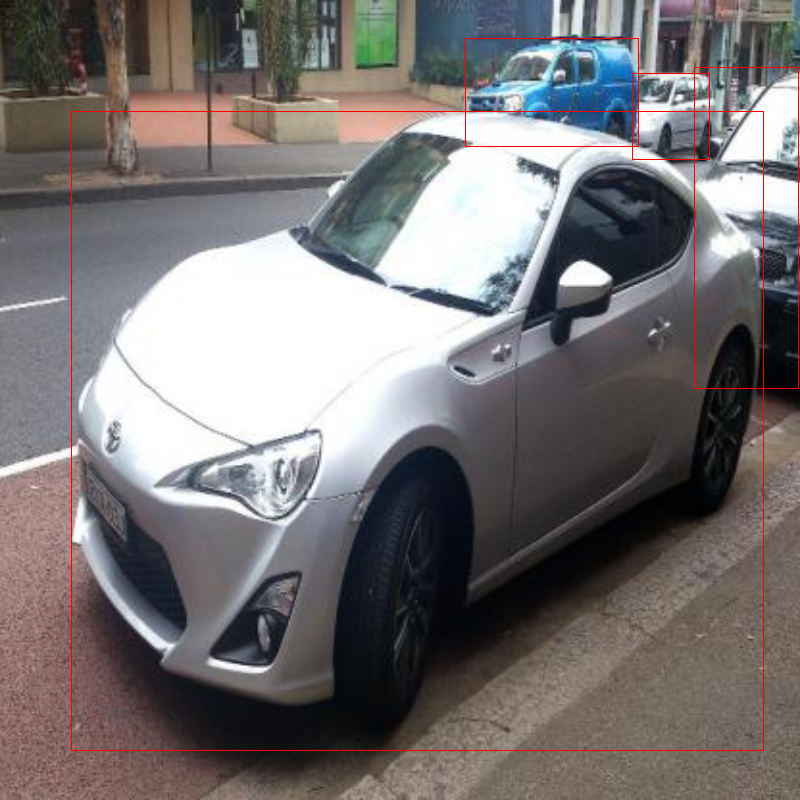

In [ ]:
img=images[185]

print(img)
image=cv2.imread(filepath+img)
image=cv2.resize(image,(800,800))

for i in objects_location[img]:
  print((i[0],i[1]), (i[2],i[3]))
  image=cv2.rectangle(image, (i[0],i[1]), (i[2],i[3]), (0,0,255), 1)
  
cv2_imshow(image)



**Anchors**



/content/drive/MyDrive/objectdetection/ca00cc1e9f910cfa_jpg.rf.71376573d4859cc7e2516f2c3ecbee47.jpg
(50,)


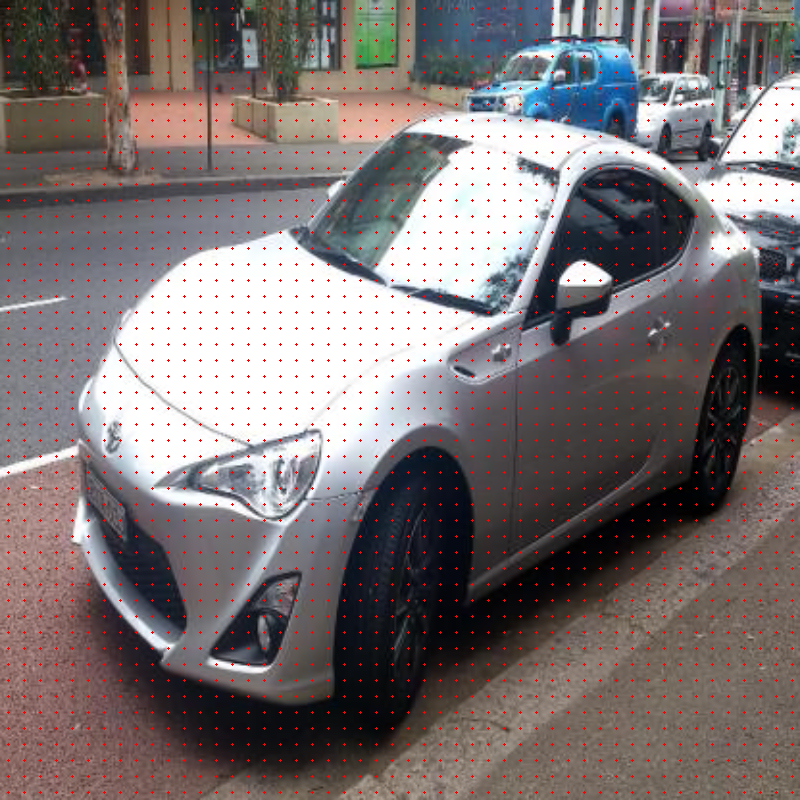

In [ ]:
image=cv2.imread(filepath+img)
print(filepath+img)
image=cv2.resize(image,(800,800))
x_anch=np.arange(16,816,16)
y_anch=np.arange(16,816,16)
print(x_anch.shape)
anchor_centers=[]
for x in x_anch:
  for y in y_anch:
    anchor_centers.append([x-8,y-8])
    image=cv2.circle(image, (x-8,y-8), radius=1, color=(0, 0, 255), thickness=-1)

cv2_imshow(image)    

In [ ]:
anchor_centers

[[8, 8],
 [8, 24],
 [8, 40],
 [8, 56],
 [8, 72],
 [8, 88],
 [8, 104],
 [8, 120],
 [8, 136],
 [8, 152],
 [8, 168],
 [8, 184],
 [8, 200],
 [8, 216],
 [8, 232],
 [8, 248],
 [8, 264],
 [8, 280],
 [8, 296],
 [8, 312],
 [8, 328],
 [8, 344],
 [8, 360],
 [8, 376],
 [8, 392],
 [8, 408],
 [8, 424],
 [8, 440],
 [8, 456],
 [8, 472],
 [8, 488],
 [8, 504],
 [8, 520],
 [8, 536],
 [8, 552],
 [8, 568],
 [8, 584],
 [8, 600],
 [8, 616],
 [8, 632],
 [8, 648],
 [8, 664],
 [8, 680],
 [8, 696],
 [8, 712],
 [8, 728],
 [8, 744],
 [8, 760],
 [8, 776],
 [8, 792],
 [24, 8],
 [24, 24],
 [24, 40],
 [24, 56],
 [24, 72],
 [24, 88],
 [24, 104],
 [24, 120],
 [24, 136],
 [24, 152],
 [24, 168],
 [24, 184],
 [24, 200],
 [24, 216],
 [24, 232],
 [24, 248],
 [24, 264],
 [24, 280],
 [24, 296],
 [24, 312],
 [24, 328],
 [24, 344],
 [24, 360],
 [24, 376],
 [24, 392],
 [24, 408],
 [24, 424],
 [24, 440],
 [24, 456],
 [24, 472],
 [24, 488],
 [24, 504],
 [24, 520],
 [24, 536],
 [24, 552],
 [24, 568],
 [24, 584],
 [24, 600],
 [24, 61

In [ ]:
len(scales)*len(ration)

NameError: ignored

256.0
140.92329147447558
465.0470943893747
362.03867196751236
181.01933598375618
512.0
281.84658294895115
930.0941887787494
724.0773439350247
362.03867196751236
768.0
422.7698744234267
1395.1412831681241
1086.1160159025371
543.0580079512686


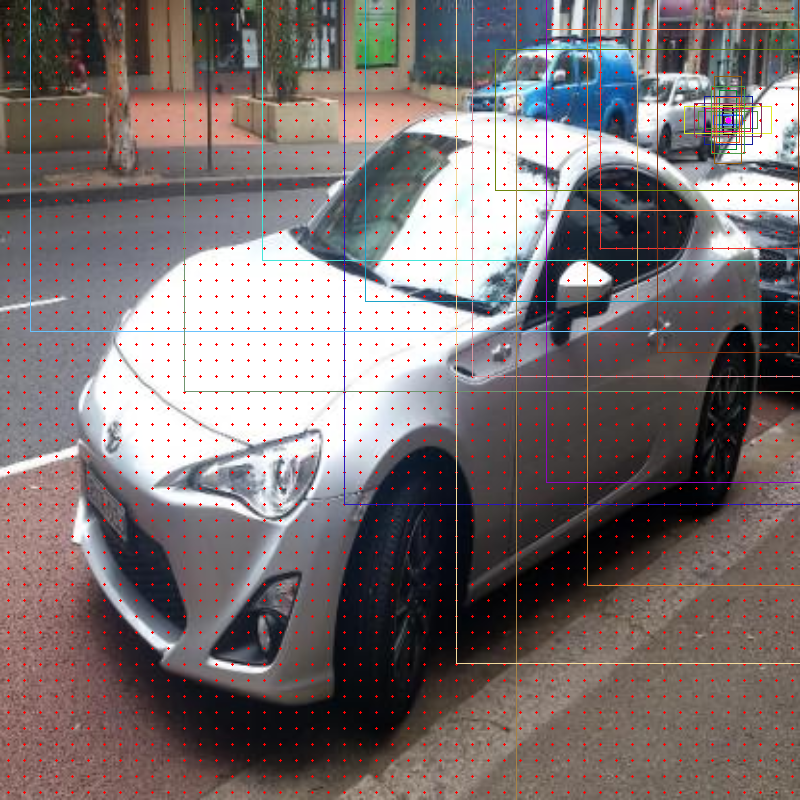

In [ ]:

Anchor_box=[]
#scales=[5,8,16,12,32,42,24]
scales=[1,2,3]
sampling=16
ration=[1,0.303030,3.3,2,0.5]

import random

for nn,A in enumerate(anchor_centers):
  for s in scales:
    for r in ration:
      h=sampling*sampling*s*np.sqrt(r)
      w=sampling*sampling*s*np.sqrt(1/r)

      x1=int(A[0]-h/2)
      y1=int(A[1]-w/2)
      x2=int(A[0]+h/2)
      y2=int(A[1]+w/2)

      Anchor_box.append([x1,y1,x2,y2])
      if(nn==2257):
          random.randint(0,255)
          print(h)
          image=cv2.rectangle(image, (x1,y1), (x2,y2), (random.randint(0,255),random.randint(0,255),random.randint(0,255)), 1)
          image=cv2.circle(image,(A[0],A[1]),3,(255,0,255),-1)
cv2_imshow(image)          


In [ ]:
Anchor_box=np.array((Anchor_box))
valid_anchor_index=np.where((Anchor_box[:,0]>=0)&(Anchor_box[:,1]>=0)&(Anchor_box[:,2]<=800)&(Anchor_box[:,3]<=800))[0]
print(Anchor_box.shape,valid_anchor_index.shape)

(87500, 4) (33320,)


In [ ]:
def iou_area(boxA, boxB):
	# determine the (x, y)-coordinates of the intersection rectangle
	xA = max(boxA[0], boxB[0])
	yA = max(boxA[1], boxB[1])
	xB = min(boxA[2], boxB[2])
	yB = min(boxA[3], boxB[3])
	# compute the area of intersection rectangle
	interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)
	# compute the area of both the prediction and ground-truth
	# rectangles
	boxAArea = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
	boxBArea = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
	# compute the intersection over union by taking the intersection
	# area and dividing it by the sum of prediction + ground-truth
	# areas - the interesection area
	iou = interArea / float(boxAArea + boxBArea - interArea)
	# return the intersection over union value
	return iou

In [ ]:
def keyfn(x):
  return x[0]
anchor_ious=[]
for A in valid_anchor_index:
  iou_gt=[]
  for gt in objects_location[img]:
    iou_gt.append([iou_area(Anchor_box[A],gt),gt,Anchor_box[A]])
  mx=sorted(iou_gt,key=keyfn)[-1]

  anchor_ious.append(mx)  

    


In [ ]:
sorted(anchor_ious,key=keyfn)[-200:]

[[0.5933644480519481, [71, 111, 763, 750, 'Car'], array([ 72, 120, 584, 632])],
 [0.5933644480519481, [71, 111, 763, 750, 'Car'], array([ 72, 136, 584, 648])],
 [0.5933644480519481, [71, 111, 763, 750, 'Car'], array([ 72, 152, 584, 664])],
 [0.5933644480519481, [71, 111, 763, 750, 'Car'], array([ 72, 168, 584, 680])],
 [0.5933644480519481, [71, 111, 763, 750, 'Car'], array([ 72, 184, 584, 696])],
 [0.5933644480519481, [71, 111, 763, 750, 'Car'], array([ 72, 200, 584, 712])],
 [0.5933644480519481, [71, 111, 763, 750, 'Car'], array([ 72, 216, 584, 728])],
 [0.5933644480519481, [71, 111, 763, 750, 'Car'], array([ 72, 232, 584, 744])],
 [0.5933644480519481, [71, 111, 763, 750, 'Car'], array([ 88, 120, 600, 632])],
 [0.5933644480519481, [71, 111, 763, 750, 'Car'], array([ 88, 136, 600, 648])],
 [0.5933644480519481, [71, 111, 763, 750, 'Car'], array([ 88, 152, 600, 664])],
 [0.5933644480519481, [71, 111, 763, 750, 'Car'], array([ 88, 168, 600, 680])],
 [0.5933644480519481, [71, 111, 763, 750

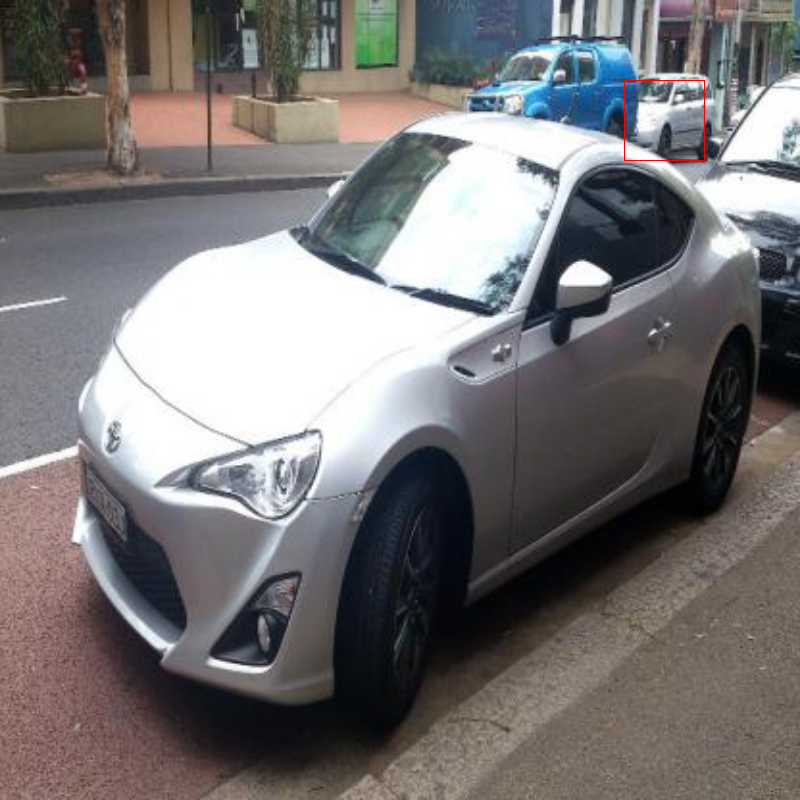

In [ ]:

image=cv2.imread(filepath+img)
image=cv2.resize(image,(800,800))

image=cv2.rectangle(image, (624,  80),(704, 160), (0,0,255), 1)
  
cv2_imshow(image)

In [ ]:
labels=np.ones((len(anchor_ious),1))*-1
anchor_ious=np.array((anchor_ious))
labels[anchor_ious[:,0]>0.65]=1
labels[anchor_ious[:,0]<0.3]=0

pos_index = np.where(labels == 1)[0]
neg_index = np.where(labels == 0)[0]
print(len(pos_index),len(neg_index))

Anchor_labels=np.ones((Anchor_box.shape[0],1))*-1
Anchor_labels[valid_anchor_index]=labels

83 30661


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [ ]:
n_sample = 256
pos_ratio = 0.5
n_pos =int( pos_ratio * n_sample)

pos_index = np.where(labels == 1)[0]
if len(pos_index) > n_pos:
    disable_index = np.random.choice(pos_index, size=(len(pos_index) - n_pos), replace=False)
    labels[disable_index] = -1
    
n_neg = n_sample * np.sum(labels == 1)
neg_index = np.where(labels == 0)[0]
if len(neg_index) > n_neg:
    disable_index = np.random.choice(neg_index, size=(len(neg_index) - n_neg), replace = False)
    labels[disable_index] = -1
    

In [ ]:
max_iou_boxes=np.array((anchor_ious[:,1]))

temp=[]
for i in max_iou_boxes:
  temp.append(i[:4])
max_iou_boxes=np.array((temp))

In [ ]:
valid_anchor_boxes=Anchor_box[valid_anchor_index]

height = valid_anchor_boxes[:, 2] - valid_anchor_boxes[:, 0]
width = valid_anchor_boxes[:, 3] - valid_anchor_boxes[:, 1]
ctr_y = valid_anchor_boxes[:, 0] + 0.5 * height
ctr_x = valid_anchor_boxes[:, 1] + 0.5 * width

base_height = max_iou_boxes[:, 2] - max_iou_boxes[:, 0]
base_width = max_iou_boxes[:, 3] - max_iou_boxes[:, 1]
base_ctr_y = max_iou_boxes[:, 0] + 0.5 * base_height
base_ctr_x = max_iou_boxes[:, 1] + 0.5 * base_width

#loc of valid anchor boxes = (y-ya/ha), (x-xa/wa), log(h/ha), log(w/wa) 
eps  =  np . finfo ( float) . eps 
print(eps)
height  =  np . maximum ( height ,  eps )  # let height = 0, a minimum of eps! 
width  =  np . maximum ( width ,  eps ) 

dy  =  ( base_ctr_y  -  ctr_y )  /  height 
dx  =  ( base_ctr_x  - ctr_x) / width
dh = np.log(base_height / height)
dw = np.log(base_width / width)

anchor_locs = np.vstack((dy, dx, dh, dw)).transpose()
print(anchor_locs.shape)

2.220446049250313e-16
(33320, 4)


In [ ]:
for i in anchor_locs:
  print(i)

Streaming output truncated to the last 5000 lines.
[-1.03645833  0.6171875   1.28209058  1.20240908]
[-1.89047619  0.34097421  1.88562561  0.60483253]
[ 0.3739255  -0.8        -1.21068102  1.11748077]
[ 0.48154982 -0.62222222 -0.95772792  0.86616634]
[-1.47037037  0.43911439  1.63431118  0.85778563]
[-0.73247232  0.21915285  0.93746713  0.16279513]
[-2.4875      1.28125     2.15755932  2.07787782]
[-4.41111111  0.71034483  2.73292347  1.48317071]
[-1.36896552  2.28888889  1.56285221  2.65324196]
[-1.75663717  1.80701754  1.81219814  2.41685319]
[-3.48245614  0.91150442  2.49653469  1.73251664]
[-1.5546875   0.80078125  1.68755569  1.60787419]
[-2.79577465  0.44206009  2.27690608  1.008866  ]
[ 0.56008584 -1.4084507  -0.80664755  1.50876125]
[-1.09668508  1.13186813  1.34108892  1.94904495]
[-2.18131868  0.56906077  2.02872645  1.26140742]
[-0.77734375  0.40039062  0.99440851  0.91472701]
[-1.40780142  0.22150538  1.59082607  0.31786705]
[ 0.35950413 -0.55248619 -1.25001194  0.57294409]

In [ ]:
Anchor_location=np.ones((Anchor_box.shape[0],4))*-1
Anchor_location[valid_anchor_index]=anchor_locs

In [ ]:
vaid=300
print(valid_anchor_index[vaid])
print(max_iou_boxes[vaid])
print(Anchor_location[valid_anchor_index[vaid]])

5861
[ 71 111 763 750]
[3.44285714 0.43266476 1.88562561 0.60483253]


In [ ]:
class siblingnetwork(torch.nn.Module):
  def __init__(self,feature=256):
    super().__init__()
    self.conv3=torch.nn.Conv2d(feature,512,3,1,1)
    self.conv3.weight.data.normal_(0, 0.01)

    self.convcls=torch.nn.Conv2d(512,2*35,1)
    self.convcls.weight.data.normal_(0, 0.01)

    self.convreg=torch.nn.Conv2d(512,4*35,1)
    self.convreg.weight.data.normal_(0, 0.01)
  
  def forward(self,bb_features):

    x=self.conv3(bb_features)
    cls=self.convcls(x)
    reg=self.convreg(x)

    return cls,reg




In [ ]:
class RPN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.backbone =torch.hub.load('pytorch/vision:v0.7.0', 'resnet18', pretrained=True)
    modules = list(self.backbone.children())[:-3]  # delete the last fc layer.
    self.backbone = torch.nn.Sequential(*modules)

    self.sibling=siblingnetwork()
  def classification_loss(self,prediction,target):
    loss=F.cross_entropy(prediction, target.long(), ignore_index = -1)
    return loss
  def regression_loss(self,prediction,target):
    x = torch.abs(target - prediction)
    loss = ((x < 1).float() * 0.5 * x**2) + ((x >= 1).float() * (x-0.5)) 
    return loss.sum()   
  def forward(self,input_image):
    y=self.backbone(input_image)
    print(y.shape)
    assert(y.shape[2:]==(50,50))
    cls,reg=self.sibling(y)
    print(cls.shape,reg.shape)

    return [cls,reg]
  def loss(self,prediction,target):
    cls,reg=prediction
    anc_lab,anc_bbbox=target

    cls_scores=cls.permute(0,2,3,1).contiguous().view(1,-1,2)
    reg_scores=reg.permute(0,2,3,1).contiguous().view(1,-1,4)

    cls_scores=torch.squeeze(cls_scores,0)
    reg_scores=torch.squeeze(reg_scores,0)


    pos_lab=anc_lab>0
    pos_lab=pos_lab.expand_as(reg_scores)
    loc_pred=reg_scores[pos_lab].view(-1,4)
    loc_tar=anc_bbbox[pos_lab].view(-1,4)
    print(loc_pred.shape,loc_tar.shape)
    print(cls_scores.shape,anc_lab.shape)
    print(len(torch.where(anc_lab==1)[0]))

    cls_loss=self.classification_loss(cls_scores,anc_lab)
    reg_loss=self.regression_loss(loc_pred,loc_tar)

    








  







In [ ]:
image=cv2.imread(filepath+img)
image=cv2.resize(image,(800,800))

image=torch.tensor(image,dtype=torch.float).permute(2,0,1)
image=image.unsqueeze(0)
region_propasal=RPN()

pred=region_propasal(image)
loss=region_propasal.loss(pred,[torch.tensor(Anchor_labels),torch.tensor(Anchor_location)])


Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.7.0


torch.Size([1, 256, 50, 50])
torch.Size([1, 70, 50, 50]) torch.Size([1, 140, 50, 50])
torch.Size([83, 4]) torch.Size([83, 4])
torch.Size([87500, 2]) torch.Size([87500, 1])
83


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if __name__ == '__main__':


In [ ]:
print(Anchor_location.shape)
print(Anchor_labels.shape)

(87500, 4)
(87500, 1)


In [ ]:
dummy=torch.ones((87500, 4))

In [ ]:
Anchor_labels=torch.tensor(Anchor_labels)
pos_lab=torch.where(Anchor_labels>0)
print(pos_lab)


(tensor([37545, 37580, 37615, 37650, 37685, 37720, 37755, 39260, 39295, 39330,
        39365, 39400, 39435, 39470, 39505, 41010, 41045, 41080, 41115, 41150,
        41185, 41220, 41255, 42760, 42795, 42830, 42865, 42900, 42935, 42970,
        43005, 44510, 44545, 44580, 44615, 44650, 44685, 44720, 44755, 46260,
        46295, 46330, 46365, 46400, 46435, 46470, 46505, 48010, 48045, 48080,
        48115, 48150, 48185, 48220, 48255, 49760, 49795, 49830, 49865, 49900,
        49935, 49970, 50005, 57930, 57933, 57968, 59680, 59683, 59718, 61430,
        61433, 61468, 71995, 73745, 79221, 79256, 80901, 80936, 80971, 81006,
        81041, 81076, 81111]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


In [ ]:
tst=torch.tensor([True,True,False,True,False]).view(-1,1)
dummy=torch.ones((5,5))
tst=tst.expand_as(dummy)
print(tst)

tensor([[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True],
        [False, False, False, False, False],
        [ True,  True,  True,  True,  True],
        [False, False, False, False, False]])


In [ ]:
x=anchor_ious[:,0]>0.65
for i,j in zip(x,anchor_ious[:,0]):
  print(i,j)

Streaming output truncated to the last 5000 lines.
False 0.1761360210623631
False 0.27141216245503014
False 0.15058128169451376
False 0.245311019105103
False 0.1208462802066222
False 0.23135341288544328
False 0.02085137085137085
False 0.0212143759018759
False 0.03599441797796064
False 0.02132260101010101
False 0.06129807692307692
False 0.02142857142857143
False 0.06721529591484748
False 0.03775252525252525
False 0.0510625
False 0.08919722497522299
False 0.03766459235209235
False 0.1195700354609929
False 0.03766233766233766
False 0.1267900959179121
False 0.0834054834054834
False 0.15693585151416475
False 0.20900925514838975
False 0.08989652021436863
False 0.1191919191919192
False 0.11471861471861472
False 0.19427157001414427
False 0.12411084186664582
False 0.11175015816414563
False 0.17737306547219914
False 0.2499573869689351
False 0.14991656760205474
False 0.14936868686868687
False 0.22502330830757153
False 0.12595680382787802
False 0.12024104429101003
False 0.24177660583972255
False 0

In [ ]:
iou_area( [71, 111, 763, 750, 'Car'],[541, 234, 722, 325])

0.03775252525252525